### Pre-class work session 8.1

Your tasks
>1. Construct a random surfer simulation that gives the same results as the PageRank
algorithm.
>2. Visualize the PageRank results by varying node color in your network.
>3. Draw a plot showing how the error in your simulation results decreases as the random
surfer simulation is run for more steps.

The results from your simulation should be very similar to the PageRank values above.
The rules of the random surfer simulation are as follows:
>● Start the surfer on a random node in the network.
>● Repeat N times:
>>○ With probability α, move the surfer to a random neighbor of the current node. If the
current node has no neighbors, move the surfer to a random node in the network.

>>○ With probability (1 –  α) , move the surfer to a random node in the network.
To calculate the approximate PageRank of each node, keep track of how many times the surfer
visited each node and divide by the total number of visits so that the sum of all PageRank scores is
1.
In the NetworkX library, the default value for α is 0.85.
Draw a plot of the average absolute difference between your PageRank values from the simulation
and the output from the networkx.pagerank() function as a function of N, the number of steps
taken by the random surfer.

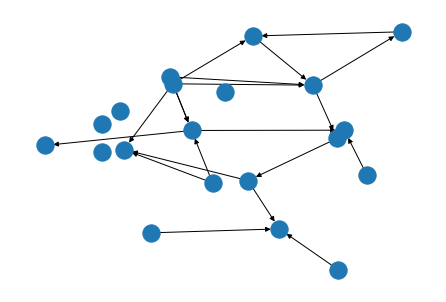

In [9]:
import networkx as nx
import pylab as plt
import numpy as np

alpha = 0.85
n = 20

g = nx.erdos_renyi_graph(n, 0.05, directed=True, seed=123)
nx.draw(g, pos = nx.kamada_kawai_layout(g))
rank_networkx = list(nx.pagerank(g).values())

In [10]:
print(rank_networkx)

[0.04844047615612462, 0.023486241500153632, 0.023486241500153632, 0.07232778588018188, 0.1149187108898443, 0.023486241500153632, 0.06403671285310614, 0.08995703160432661, 0.023486241500153632, 0.023486241500153632, 0.09952190329460381, 0.023486241500153632, 0.023486241500153632, 0.023486241500153632, 0.044073325128329344, 0.023486241500153632, 0.08496618467313241, 0.07232778588018188, 0.023486241500153632, 0.0745676686386328]


/Users/rebeccamqamelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


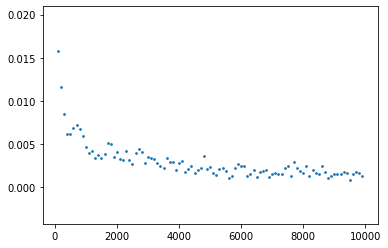

In [11]:
def simulate(g, n_iterations, alpha):
    
    rank = np.zeros(g.number_of_nodes())
    node = np.random.choice(list(g.nodes()))

    for i in range(n_iterations):
        if np.random.rand() < alpha:
            # If the node has neighbors, use these links to get to the next randomly chosen node
            if len(list(g.neighbors(node))) > 0:
                next_node = np.random.choice(list(g.neighbors(node)))
            # Otherwise just randomly choose another node ("website")
            else:
                next_node = np.random.choice(list(g.nodes))
            rank[next_node] += 1
            node = next_node
        else:
            next_node = np.random.choice(list(g.nodes))
            rank[next_node] += 1
            node = next_node

    page_rank = rank/np.sum(rank)
    return(page_rank)


diff_result = []
for iteration in range(0,10000,100):
    diff = []
    rank_simulation = simulate(g,iteration,alpha)
    for i in range(n):
        diff.append(abs(rank_networkx[i]-rank_simulation[i]))
    diff_result.append(np.mean(diff))

x = range(0, 10000, 100)

plt.scatter(x,diff_result,s=3)
plt.show()